# Question 1

## )A

C:\Users\erive\AppData\Local\Temp\ipykernel_27868\1887727796.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulated_output = float(analysis['output'])


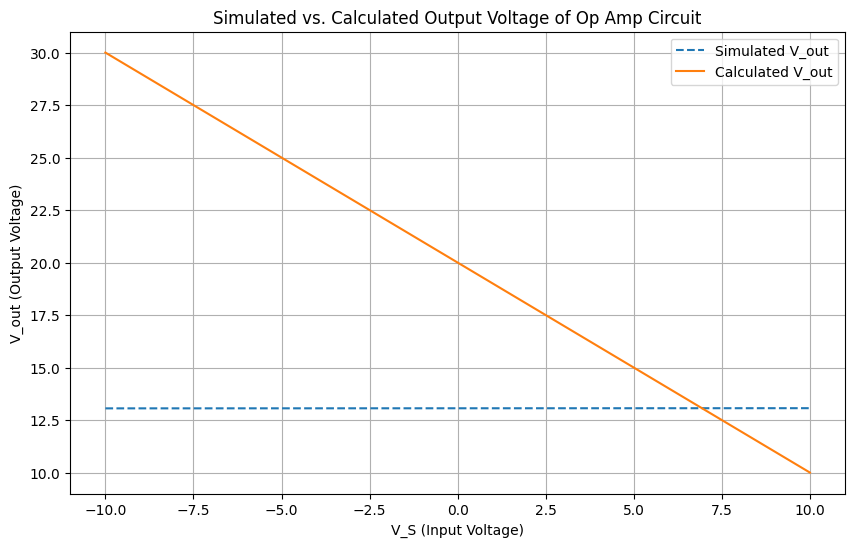

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Parameters
R_F_value = 10 * 1e3  # 10 kOhm
R_S_value = 5 * 1e3   # 5 kOhm
V_F_value = 5         # 5 V fixed feedback input

# Prepare arrays to store results
V_S_values = np.linspace(-10, 10, 100)  # Range of V_S from -10V to 10V
simulated_V_out = []
calculated_V_out = []

# Define the circuit once
circuit = Circuit('Op Amp Circuit with Model Library')
circuit.include(r'./op27.cir') 

# Define power supply for the op-amp
circuit.V(3, 'Vcc', circuit.gnd, 15)   # Positive supply
circuit.V(4, 'Vee', circuit.gnd, -15)  # Negative supply

# Add resistors and feedback input voltage
circuit.R(1, 'feedback_input', 'output', R_F_value)           # Feedback resistor
circuit.R(2, 'inverting_input', 'output', R_S_value)          # Series resistor
circuit.V(2, 'feedback_input', circuit.gnd, V_F_value)        # Fixed feedback input

# Use the op-amp model from the library with all necessary pins
circuit.X(1, 'OP27', 'non_inverting_input', 'inverting_input', 'output', 'Vcc', 'Vee')

# Loop through each V_S value
for V_S in V_S_values:
    # Update the inverting input voltage
    if 'V1' in circuit.element_names:
        circuit.V1.dc_value = V_S  # Update the value if V1 already exists
    else:
        circuit.V(1, 'inverting_input', circuit.gnd, V_S)  # Define V1 for the first time
    
    # Run the simulation
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    
    # Simulated output voltage
    simulated_output = float(analysis['output'])
    simulated_V_out.append(simulated_output)
    
    # Calculate the theoretical output
    calculated_output = V_F_value * (2 * R_F_value / R_S_value) + V_S * (1 - R_F_value / R_S_value)
    calculated_V_out.append(calculated_output)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(V_S_values, simulated_V_out, label='Simulated V_out', linestyle='--')
plt.plot(V_S_values, calculated_V_out, label='Calculated V_out', linestyle='-')
plt.xlabel('V_S (Input Voltage)')
plt.ylabel('V_out (Output Voltage)')
plt.title('Simulated vs. Calculated Output Voltage of Op Amp Circuit')
plt.legend()
plt.grid(True)
plt.show()


## )b

C:\Users\erive\AppData\Local\Temp\ipykernel_27868\3283541199.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output_waveform.append(float(analysis['output']))


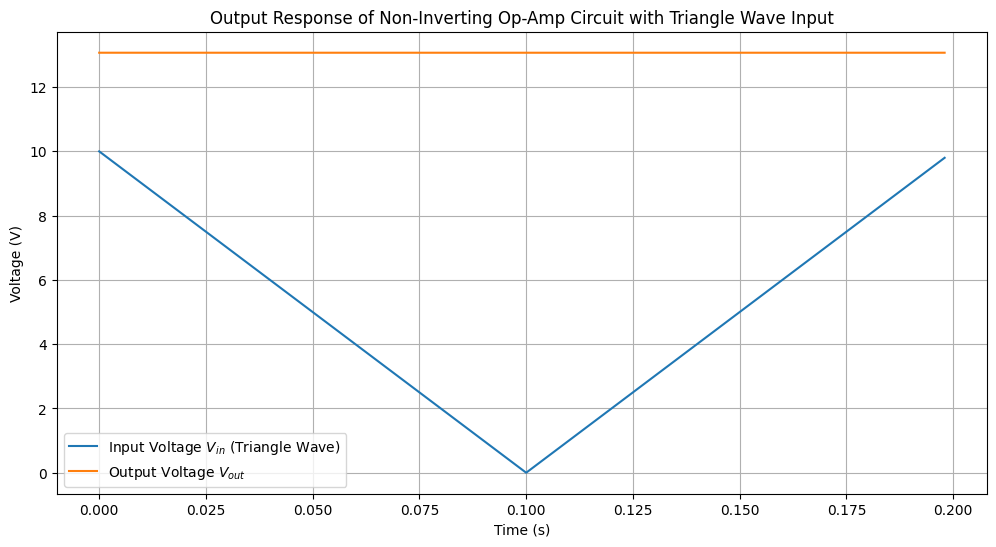

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create the circuit
circuit = Circuit('Non-Inverting Op Amp with Voltage Divider')
circuit.include(r'./op27.cir') 

# Parameters
V_s = 15            # Supply voltage for +Vs and -Vs
R1 = 20 * 1e3       # 20kΩ
R2 = 40 * 1e3       # 40kΩ
R_f = 80 * 1e3      # 80kΩ

# Set up the power supply for the op-amp
circuit.V(3, 'Vcc', circuit.gnd, V_s)   # Positive supply (+Vs)
circuit.V(4, 'Vee', circuit.gnd, -V_s)  # Negative supply (-Vs)

# Voltage divider to non-inverting input
circuit.R(1, 'Vcc', 'divider_midpoint', R1)
circuit.R(2, 'divider_midpoint', 'Vee', R2)

# Feedback and input resistors
circuit.R(3, 'input', 'output', R_f)  # Feedback resistor

# Add the op-amp with library model
circuit.X(1, 'OP27', 'divider_midpoint', 'input', 'output', 'Vcc', 'Vee')

# Set up the triangle wave input voltage
time_step = 0.002  # Time step for simulation in seconds
period = 0.2       # Period of the triangle wave
amplitude = 5      # Amplitude of the triangle wave
offset = 5         # Offset of the triangle wave

# Generate the triangle waveform manually
times = np.arange(0, period, time_step)
input_waveform = amplitude * (4 / period) * (np.abs((times % period) - period / 2) - period / 4) + offset

# Initialize lists to store the output waveform
output_waveform = []

# Run the simulation for each input point in the triangle wave
for v_in in input_waveform:
    # Set or update the input voltage source
    if 'V1' in circuit.element_names:
        circuit.V1.dc_value = v_in  # Update value if V1 already exists
    else:
        circuit.V(1, 'input', circuit.gnd, v_in)  # Define V1 for the first time
    
    # Run the operating point analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.operating_point()
    
    # Record the output voltage
    output_waveform.append(float(analysis['output']))

# Plot the input and output waveforms
plt.figure(figsize=(12, 6))
plt.plot(times, input_waveform, label='Input Voltage $V_{in}$ (Triangle Wave)')
plt.plot(times, output_waveform, label='Output Voltage $V_{out}$')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Output Response of Non-Inverting Op-Amp Circuit with Triangle Wave Input')
plt.legend()
plt.grid(True)
plt.show()


# Q2

## a)

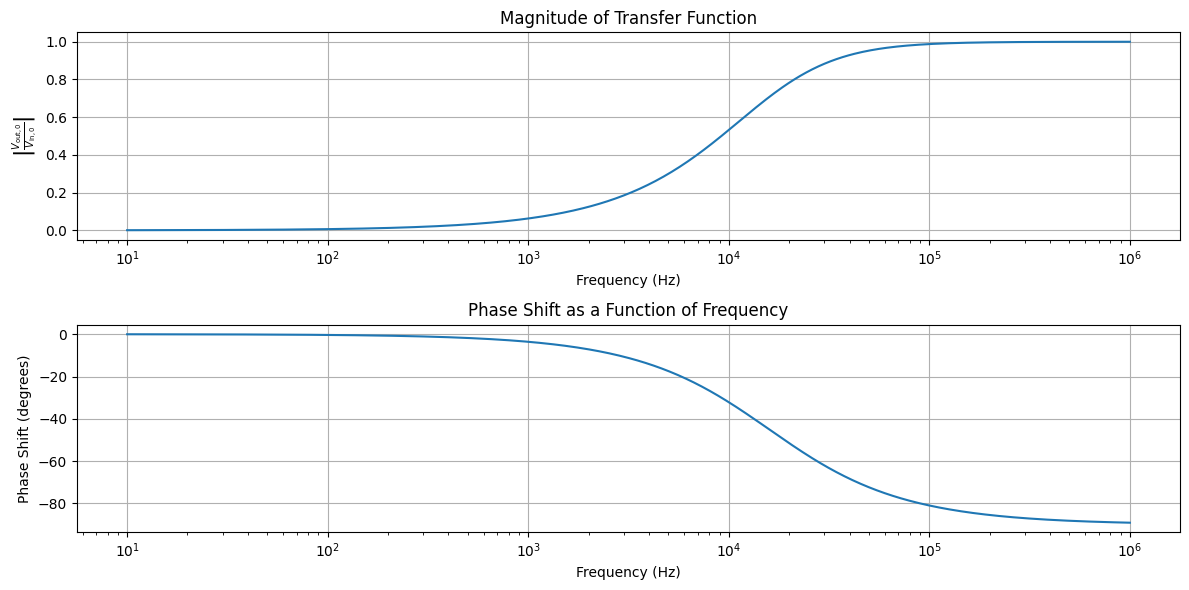

''

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Circuit parameters
R_L = 1000  # Resistance in ohms
L = 0.01    # Inductance in henries

# Frequency range
frequencies = np.logspace(1, 6, 500)  # From 10 Hz to 1 MHz
omega = 2 * np.pi * frequencies       # Angular frequency

# Calculate the magnitude of the transfer function
magnitude = (omega * L) / np.sqrt(R_L**2 + (omega * L)**2)

# Calculate the phase shift
phase_shift = np.arctan(R_L / (omega * L)) - (np.pi / 2)

# Plotting the magnitude of the transfer function
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, magnitude)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$\left| \frac{V_{\text{out},0}}{V_{\text{in},0}} \right|$')
plt.title('Magnitude of Transfer Function')
plt.grid(True)

# Plotting the phase shift
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.degrees(phase_shift))
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Phase Shift as a Function of Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()
""

## e)

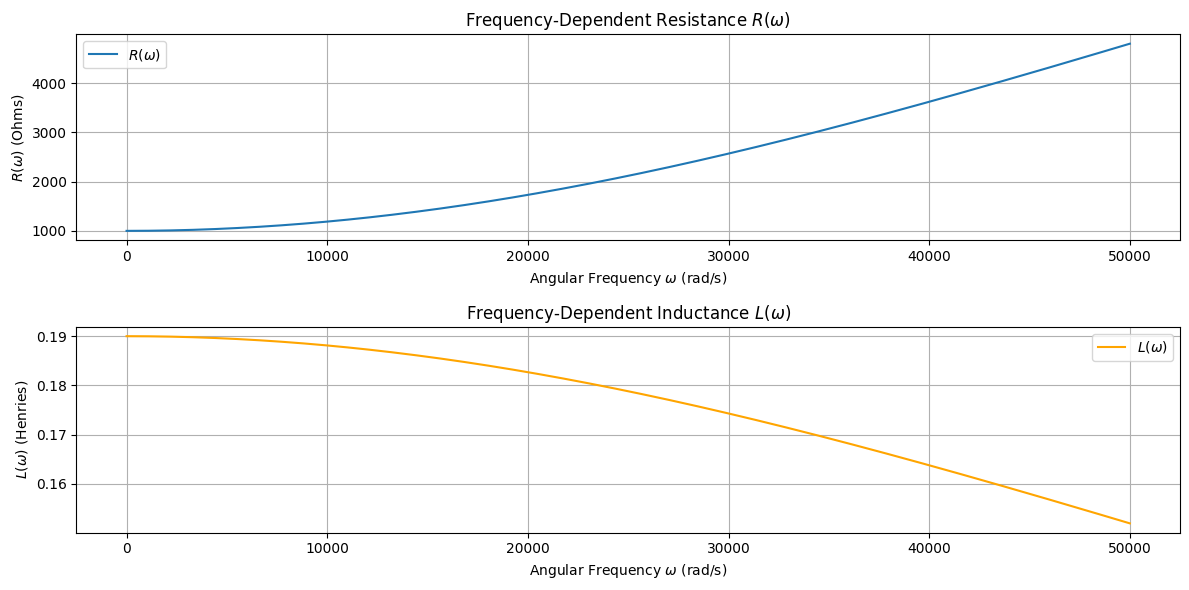

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
R1 = 20e3         # 20 kOhms
RL = 1e3          # 1 kOhm
C = 10e-9         # 10 nF

# Angular frequency range from 0 to 50,000 rad/s
omega = np.linspace(0, 50000, 500)

# Calculate R(omega) and L(omega) using the provided equations
R_omega = RL * (1 + omega**2 * C**2 * RL * R1) / (1 + omega**2 * C**2 * RL**2)
L_omega = (C * RL * (R1 - RL)) / (1 + omega**2 * C**2 * RL**2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot R(omega)
plt.subplot(2, 1, 1)
plt.plot(omega, R_omega, label=r'$R(\omega)$')
plt.xlabel(r'Angular Frequency $\omega$ (rad/s)')
plt.ylabel(r'$R(\omega)$ (Ohms)')
plt.title(r'Frequency-Dependent Resistance $R(\omega)$')
plt.grid(True)
plt.legend()

# Plot L(omega)
plt.subplot(2, 1, 2)
plt.plot(omega, L_omega, label=r'$L(\omega)$', color='orange')
plt.xlabel(r'Angular Frequency $\omega$ (rad/s)')
plt.ylabel(r'$L(\omega)$ (Henries)')
plt.title(r'Frequency-Dependent Inductance $L(\omega)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
